# Data Science Jobs in India Exploratory Data Analysis


## Using Naukri Dataset

#### Introduction

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set_theme(style="whitegrid", palette="pastel")

In [2]:
#create dataframe to read from dataset file
df = pd.read_csv('naukri_data_science_jobs_india.csv')

In [3]:
#first 5 records
df.head()

,Job_Role,Company,Location,Job Experience,Skills/Description
0,Senior Data Scientist,UPL,"Bangalore/Bengaluru, Mumbai (All Areas)",3-6,"python, MLT, statistical modeling, machine lea..."
1,Senior Data Scientist,Walmart,Bangalore/Bengaluru,5-9,"Data Science, Machine learning, Python, Azure,..."
2,Applied Data Scientist / ML Senior Engineer (P...,SAP India Pvt.Ltd,Bangalore/Bengaluru,5-10,"Python, IT Skills, Testing, Cloud, Product Man..."
3,Data Scientist,UPL,"Bangalore/Bengaluru, Mumbai (All Areas)",1-4,"python, machine learning, Data Science, data a..."
4,Data Scientist,Walmart,Bangalore/Bengaluru,4-8,"IT Skills, Python, Data Science, Machine Learn..."


In [4]:
#dataframe structure and its column type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job_Role            12000 non-null  object
 1   Company             12000 non-null  object
 2   Location            12000 non-null  object
 3   Job Experience      12000 non-null  object
 4   Skills/Description  12000 non-null  object
dtypes: object(5)
memory usage: 468.9+ KB


There are 5 columns and all these are object type

In [5]:
#number of rows and column in given dataset
df.shape

(12000, 5)

In [6]:
df.describe()

,Job_Role,Company,Location,Job Experience,Skills/Description
count,12000,12000,12000,12000,12000
unique,6563,3507,822,143,11356
top,Data Engineer,Accenture,Bangalore/Bengaluru,5-10,"Computer science, Manager Quality Assurance, F..."
freq,580,490,3383,944,8


There are 12000 rows and 5 columns

#### Exploratory Data Analysis

##### 1. Cleaning the data — finding unwanted/empty columns

In [7]:
# find missing values
df.isnull().sum()

Job_Role              0
Company               0
Location              0
Job Experience        0
Skills/Description    0
dtype: int64

There are no missing values so we dont need to drop anything

##### 2.  Categorical Features

In [8]:
#all columns are important features

categorical_features=[feature for feature in df.columns]
print(categorical_features)

['Job_Role', 'Company', 'Location', 'Job Experience', 'Skills/Description']


In [9]:
#fueatures and number of categories thay have
for feature in categorical_features:
    print(f'{feature} has {len(df[feature].unique())} categories')

Job_Role has 6563 categories
Company has 3507 categories
Location has 822 categories
Job Experience has 143 categories
Skills/Description has 11356 categories


There are 5 categorical features
All features seems to be have high number categories
Let's analize each feature

##### 3.1 Job Role

In [10]:
#top 10 jobs

jobs_df=df.groupby('Job_Role',sort=True)['Job_Role'].count().sort_values(ascending=False)[0:10].rename_axis('Job Role').reset_index(name='Job Count')
jobs_df.style.background_gradient()

,Job Role,Job Count
0,Data Engineer,580
1,Data Scientist,505
2,Data Analyst,353
3,Senior Technical Lead (Data Engineer),276
4,Business Analyst,197
5,Senior Data Engineer,197
6,Senior Data Scientist,97
7,Azure Data Engineer,80
8,Data Engineer: Data Integration,75
9,Big Data Engineer,71


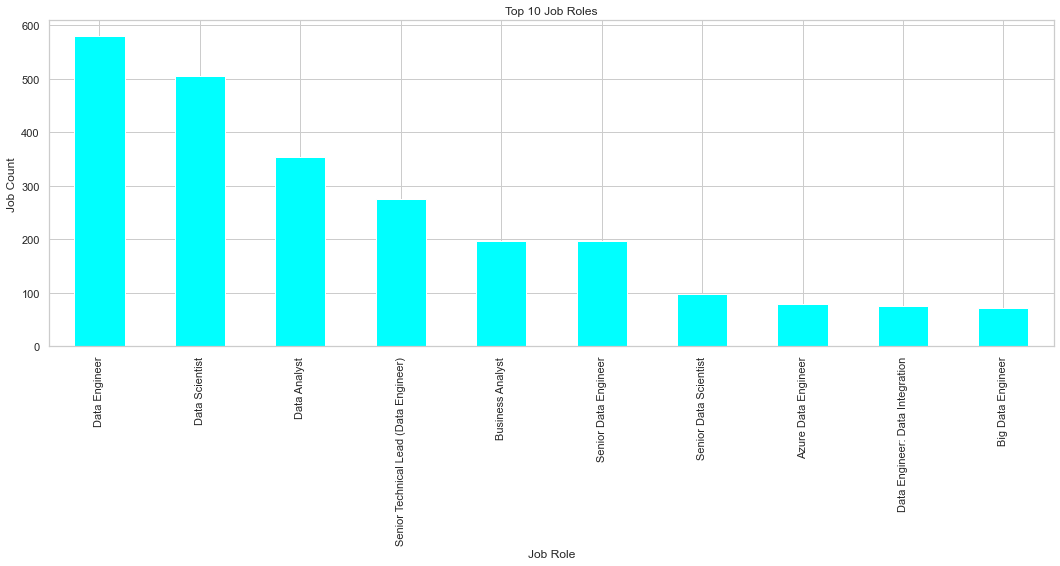

In [11]:
plt.figure(figsize=(18,6), facecolor='white')
df.groupby('Job_Role',sort=True)['Job_Role'].count().sort_values(ascending=False)[0:10].plot.bar(color='cyan')
plt.xlabel('Job Role')
plt.ylabel('Job Count')
plt.title('Top 10 Job Roles')
plt.show()

##### 3.2 Company

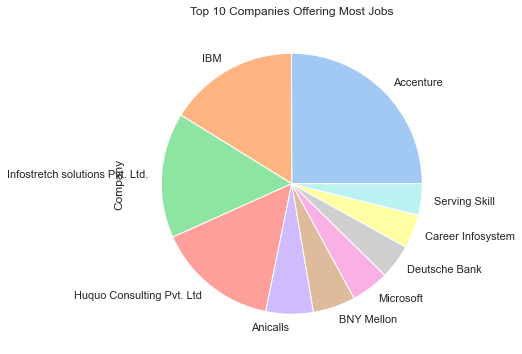

In [12]:
#top 10 companies

df.groupby('Company')['Company'].count().sort_values(ascending=False)[0:10].plot.pie(figsize=(18, 6))
plt.title('Top 10 Companies Offering Most Jobs')
plt.show()



##### 3.3 Location

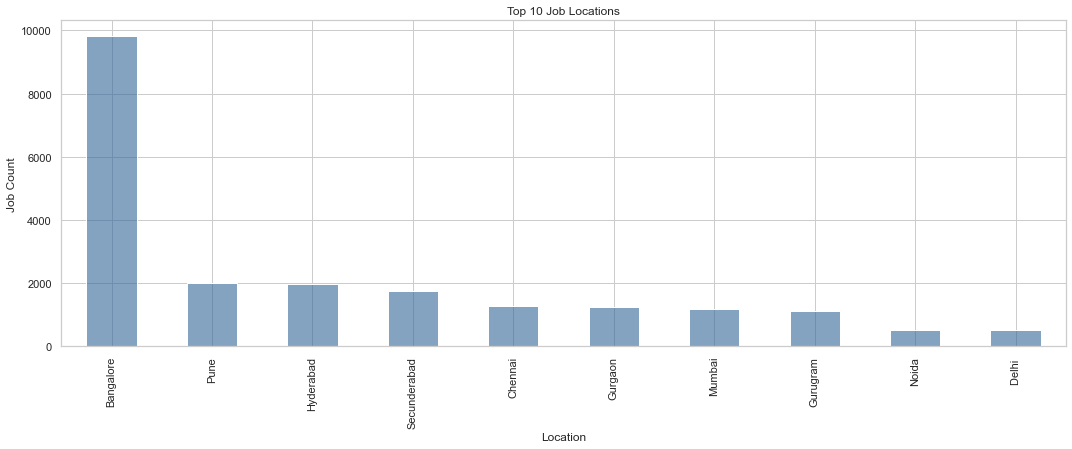

In [13]:
#top 10 job locations

#spitting values and saving to list
locations = [location for locations in df['Location'] for location in locations.strip().split(', ')]
loc_new = [location for locations in locations for location in locations.strip().split('/')]

#omit alternate names
locs=[]
for i in loc_new:
    j=i
    
    if j=='Bengaluru':
        j='Bangalore'
    locs.append(j)

#creating new dataframe of locations
loc_df = pd.DataFrame()
loc_df['Locations']=locs

#top 10 locations
plt.figure(figsize=(18,6), facecolor='white')
loc_df.groupby('Locations',sort=True)['Locations'].count().sort_values(ascending=False)[0:10].plot.bar(color=(0.2, 0.4, 0.6, 0.6))
plt.xlabel('Location')
plt.ylabel('Job Count')
plt.title('Top 10 Job Locations')
plt.show()


##### 3.4 Job Experience

In [14]:
#first 70 entries
df.groupby('Job Experience',sort=True)['Job Experience'].count()[0:70]

Job Experience
0-0                 15
0-1                 78
0-2                109
0-3                 98
0-4                 33
                  ... 
17 May - 26 May      1
17-21                1
18 May               2
18-20                1
18-23                2
Name: Job Experience, Length: 70, dtype: int64

We can see that there are outliers in this column. Experience needs to be consisting of numeric values not dates

In [15]:
#find outliers
outliers=[]
for jobExp in df['Job Experience']:
    c=False
    for j in jobExp:
        if j.isalpha():
            c=True
    if c==True:
        outliers.append(jobExp)
print(outliers)

['12 May - 21 May', 'B.Tech/B.E.', '16 May - 22 May', '18 May', '12 May - 21 May', '17 May - 26 May', '18 May']


In [16]:
#remove outliers
for i in outliers:
    df=df[df['Job Experience'] != i]

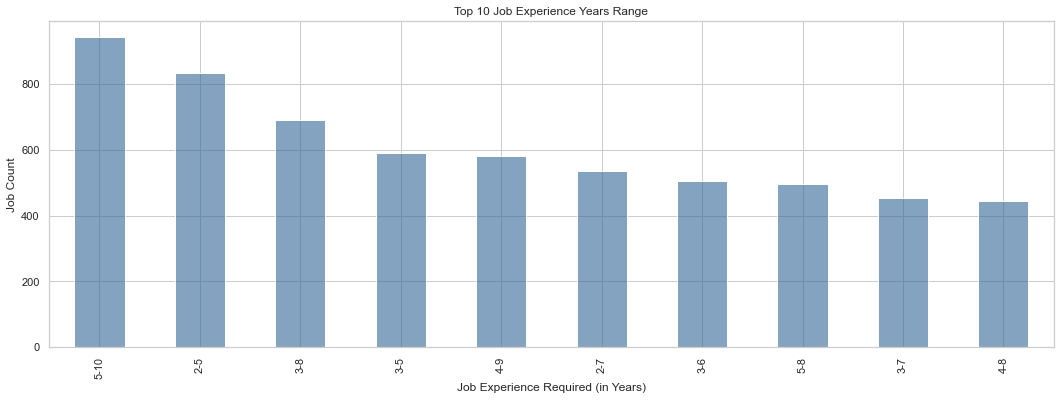

In [17]:
#top 10 job experience years

plt.figure(figsize=(18,6), facecolor='white')
df.groupby('Job Experience',sort=True)['Job Experience'].count().sort_values(ascending=False)[0:10].plot.bar(color=(0.2, 0.4, 0.6, 0.6))
plt.xlabel('Job Experience Required (in Years)')
plt.ylabel('Job Count')
plt.title('Top 10 Job Experience Years Range')
plt.show()

Let's divide the various ranges into experience level categories:
0-2: Junior
2-5: Intermediate
5-12: Mid-Level
12-16: Senior
16-20: Executive
20-above: Senior Executive

In [18]:
#function for defining experience level

def experience_level(x):
    if re.findall('-',x):
        lst =x.strip().split('-')
        lvl =(int(lst[0].strip())+int(lst[1].strip()))/2
        if (lvl >= 0 and lvl <= 2):
            return ('Junior')
        elif (lvl >= 2 and lvl <= 5):
            return ('Intermediate')
        elif (lvl >= 5 and lvl <= 12):
            return ('Mid-Level')
        elif (lvl >= 12 and lvl <= 16):
            return ('Senior')
        elif (lvl >= 16 and lvl <= 20):
            return ('Executive')
        elif (lvl >= 20):
            return ('Senior Executive')
        else:
            return('Others')
    else:
        return('Others')

In [21]:
df['Job Experience']=df['Job Experience'].apply(experience_level)
exp_df=df.groupby('Job Experience',sort=True)['Job Experience'].count().sort_values(ascending=False).rename_axis('Experience').reset_index(name='Job Count')
exp_df.style.background_gradient(cmap='Greens')

,Experience,Job Count
0,Mid-Level,5831
1,Intermediate,4959
2,Junior,770
3,Senior,361
4,Executive,67
5,Senior Executive,5


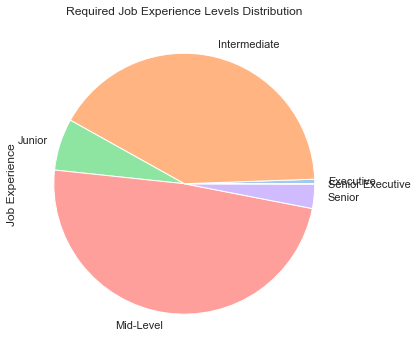

In [22]:
#experience level distribution chart

df.groupby('Job Experience')['Job Experience'].count().plot.pie(figsize=(18, 6))
plt.title('Required Job Experience Levels Distribution')
plt.show()


##### 3.4 Skills/Description

In [23]:
df.groupby('Skills/Description',sort=True)['Skills/Description'].count()[0:10]

Skills/Description
.NET framework, C#, NUnit, .Net Core, Web Api, Github, HTML, SQL Server                                                   1
.Net Core, Angular, SQL, C#, full stack development, Tech Lead, C#.Net                                                    1
.Net Core, Azure                                                                                                          1
.Net, IT Skills, Data Science, Cloud, DevOps, Azure, Web Technologies, Artificial Intelligence                            1
.Net, Javascript, C#, HTML, ASP Net, SQL, analytical, IT Skills                                                           1
.net core, microservices, azure, Docker, SQL Server, Azure DevOps, Rest API, Micro Services Architecture                  1
.net core, microservices, azure, SQL Server, Rest API, Microsoft Net, NET Core, Kubernetes                                1
.net developer, data engineer python SQL, azure developer, Java developer, UI Path developer, net, python, SAP BW

Skills need to be splitted for better understanding

In [24]:
#split and save skills in list

skills = [skill.lower() for skills in df['Skills/Description'] for skill in skills.split(', ')]
skills_new=[]
for i in skills:
    j=i
    
    if j=='data analyst' or j=='data analytics':
        j='data analysis'
    if j=='analytics':
        j='analytical'
    skills_new.append(j)

#create new dataframe for skills
skills_df = pd.DataFrame()
skills_df['Skills']=skills_new

#top 20 skills required
skills_df.groupby('Skills',sort=True)['Skills'].count().sort_values(ascending=False)[0:20]



Skills
python              3148
it skills           2905
data analysis       2673
analytical          2129
machine learning    1778
sql                 1524
big data            1393
computer science    1339
data science        1287
cloud               1240
java                1210
spark                992
aws                  968
data management      861
agile                818
tableau              739
azure                707
consulting           681
hadoop               652
testing              644
Name: Skills, dtype: int64

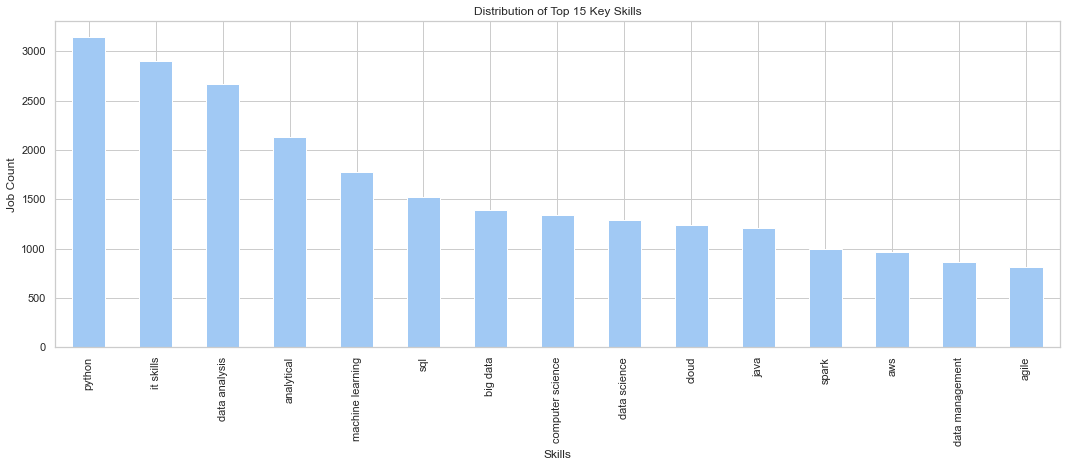

In [25]:
#top 15 skills chart

plt.figure(figsize=(18,6), facecolor='white')
skills_df.groupby('Skills',sort=True)['Skills'].count().sort_values(ascending=False)[0:15].plot.bar()
plt.xlabel('Skills')
plt.ylabel('Job Count')
plt.title('Distribution of Top 15 Key Skills')
plt.show()

Now let's look at mostly required skills for 3 main data science job - data engineer, data scientist and data analyst

[Text(0.5, 1.0, 'Top 5 Skills Required for Data Engineering Jobs')]

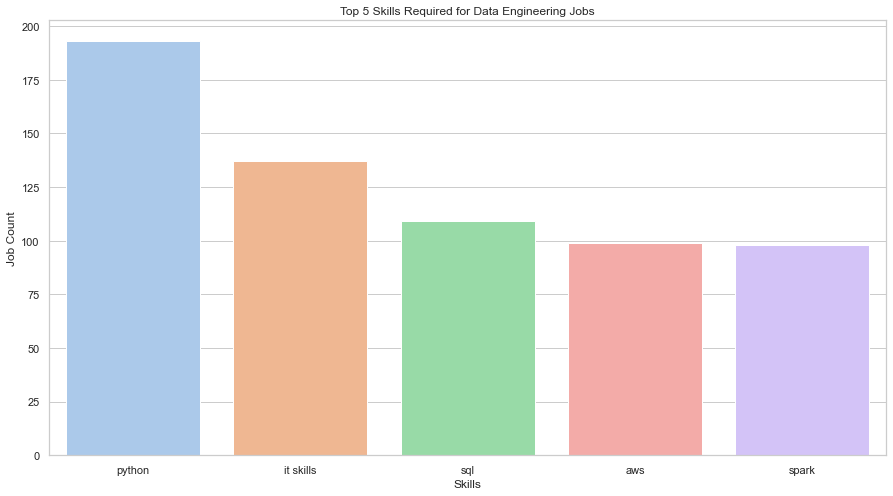

In [26]:
# skills for data engineering


dataEngineer_df=df.loc[df['Job_Role'] =='Data Engineer']


engineerSkills = [skill.lower() for skill in dataEngineer_df['Skills/Description'] for skill in skill.split(', ')]
engineerSkills_df = pd.DataFrame()
engineerSkills_df['Skills']=engineerSkills

nwdf=engineerSkills_df.groupby('Skills',sort=True)['Skills'].count().sort_values(ascending=False)[0:5].reset_index(name='Job Count')

plt.figure(figsize=(15,8))

sns.barplot(x=nwdf.Skills, y=nwdf['Job Count']).set(title='Top 5 Skills Required for Data Engineering Jobs')


[Text(0.5, 1.0, 'Top 5 Skills Required for Data Scientist Jobs')]

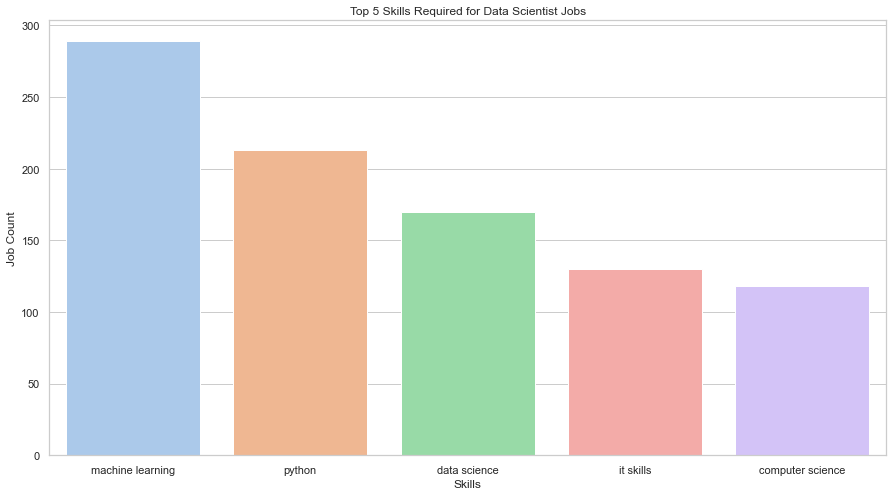

In [27]:
# skills for data science


dataScientist_df=df.loc[df['Job_Role'] =='Data Scientist']


scientistSkills = [skill.lower() for skill in dataScientist_df['Skills/Description'] for skill in skill.split(', ')]
scientistSkills_df = pd.DataFrame()
scientistSkills_df['Skills']=scientistSkills

nwdf=scientistSkills_df.groupby('Skills',sort=True)['Skills'].count().sort_values(ascending=False)[0:5].reset_index(name='Job Count')

plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid", palette="pastel")

sns.barplot(x=nwdf.Skills, y=nwdf['Job Count']).set(title='Top 5 Skills Required for Data Scientist Jobs')


[Text(0.5, 1.0, 'Top 5 Skills Required for Data Analyst Jobs')]

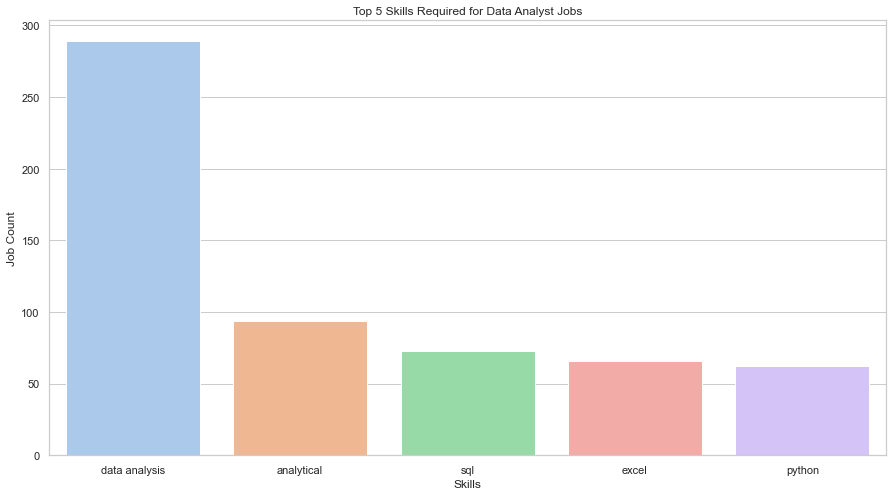

In [28]:
# skills for data analysis


dataAnalyst_df=df.loc[df['Job_Role'] =='Data Analyst']


analystSkills = [skill.lower() for skill in dataAnalyst_df['Skills/Description'] for skill in skill.split(', ')]
analystSkills_new=[]
for i in analystSkills:
    j=i
    
    if j=='data analyst':
        j='data analysis'
    if j=='analytics':
        j='analytical'
    analystSkills_new.append(j)
    
analystSkills_df = pd.DataFrame()
analystSkills_df['Skills']= analystSkills_new

nwdf=analystSkills_df.groupby('Skills',sort=True)['Skills'].count().sort_values(ascending=False)[0:5].reset_index(name='Job Count')

plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid", palette="pastel")

sns.barplot(x=nwdf.Skills, y=nwdf['Job Count']).set(title='Top 5 Skills Required for Data Analyst Jobs')

#### Conclusion
1. Dataset has 12000 rows and 5 columns and there are no missing values
2. There are 5 categorical features (Job Role, Company, Location, Job Experience, Skills) and all of them has more than 100 categories
3. Most required Data Science related job roles are Data Engineer, Data Scientist and Data Analyst 
4. Most jobs are offered by companies Accenture and IBM
5. Location with most jobs available are Bangalore and Pune
6. Mostly required experience level is mid-level which means 5-12 years of experience
7. Mostly required skills are Python, Machine Learning, Data Analysis, SQL
8. Overall: Mid-Level Data Engineer with Python and SQL skills in Bangalore is most likely to find a job
